In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

 ## Step 1: Load data

In [4]:
import pandas as pd

csv_path = "/content/drive/MyDrive/Colab Notebooks/final_year_project/mirna_features.csv"
df = pd.read_csv(csv_path)

print(df.head())


          miRNA  label  length  gc_content  au_content
0   hsa-mir-575      1      19    0.631579    0.368421
1  hsa-mir-451a      1      22    0.363636    0.636364
2   hsa-mir-484      1      22    0.636364    0.363636
3  hsa-mir-1297      1      17    0.352941    0.647059
4  hsa-mir-5100      1      22    0.590909    0.409091


## Step 2: Prepare input features and target

In [5]:
X = df[['length', 'gc_content', 'au_content']]
y = df['label']

## Step 3: Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4: Train a Random Forest model

In [15]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

## Step 5: Predictions and evaluation

In [8]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

## Step 6: Metrics report

In [9]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53        60
           1       0.29      0.26      0.27        43

    accuracy                           0.43       103
   macro avg       0.40      0.40      0.40       103
weighted avg       0.42      0.43      0.42       103

ROC-AUC Score: 0.38953488372093026


## Step 7: Confusion Matrix

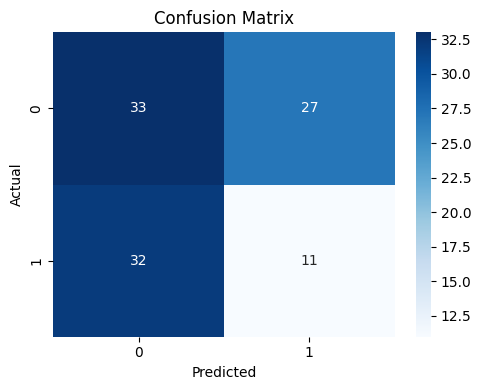

In [10]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Step 8: Feature Importance

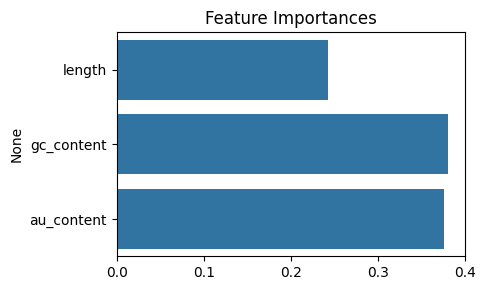

In [11]:
# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(5, 3))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [12]:
# Save predictions and probabilities
df_out = X_test.copy()
df_out['actual'] = y_test.values
df_out['predicted'] = y_pred
df_out['probability'] = y_proba
df_out.to_csv("model_output.csv", index=False)

In [13]:
from google.colab import files
files.download("model_output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>